In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('billboard_2000_2018_spotify_lyrics.csv',
                 encoding='iso-8859-1', na_values='unknown')
#Colunas retiradas:['year', 'simple_title', 'main_artist', 'spotify_link',
#                   'spotify_id', 'video_link', 'broad_genre', 'analysis_url', 'lyrics']

df = df[['date', 'title', 'artist', 'peak_pos', 'last_pos', 'weeks', 'rank', 'change', 'genre', 'energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key','duration_ms', 'loudness', 'valence', 'mode']]

# Removendo na
df = df.dropna()

In [3]:
df.head()

,date,title,artist,peak_pos,last_pos,weeks,rank,change,genre,energy,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
1,6/21/18,All Girls Are The Same,Juice WRLD,41,49,5,41,8,[u'rap'],0.529,...,0.3070,0.0769,0.000335,4.0,0.671,0.0,165820.0,-7.226,0.203,1.0
2,6/21/18,All Mine,Kanye West,11,11,2,31,-20,"[u'pop rap', u'rap']",0.308,...,0.3380,0.1250,0.000000,4.0,0.925,11.0,145507.0,-6.562,0.265,0.0
5,6/21/18,Back To You,Selena Gomez,22,31,5,22,9,"[u'dance pop', u'pop', u'post-teen pop']",0.724,...,0.0486,0.0945,0.000002,4.0,0.601,6.0,207905.0,-4.856,0.508,1.0
7,6/21/18,Be Careful,Cardi B,11,25,11,23,2,"[u'pop', u'rap']",0.568,...,0.4110,0.0256,0.000000,4.0,0.820,6.0,210787.0,-8.230,0.535,0.0
8,6/21/18,Beautiful Crazy,Luke Combs,58,77,4,93,-16,"[u'contemporary country', u'country road']",0.402,...,0.0262,0.6760,0.000000,4.0,0.552,11.0,193200.0,-7.431,0.382,1.0


1. O gênero é um fator importante para que uma música alcance o top 100 da billboard?

Para responder essa pergunta, primeiramente vamos tratar o data frame em relação aos seus gêneros.

In [4]:
dataFrameGeneros = df[['rank', 'genre']]

dfRankGroups = dataFrameGeneros.groupby('genre').count().sort_values(by='rank')
dfRankGroups = dfRankGroups[dfRankGroups.index != '[]']
dfRankGroups[dfRankGroups['rank'] > 10]

,rank
genre,
"[u'alternative metal', u'neo mellow', u'pop rock', u'post-grunge']",11
"[u'acoustic pop', u'dance pop', u'folk-pop', u'neo mellow', u'pop', u'pop rock', u'post-teen pop', u'viral pop']",11
"[u'dance pop', u'dirty south rap', u'gangster rap', u'hip hop', u'pop rap', u'r&b', u'rap', u'trap music']",11
"[u'neo mellow', u'pop rock']",11
"[u'contemporary country', u'country', u'country road', u'modern country rock', u'pop rock']",11
"[u'alternative metal', u'alternative rock', u'funk metal', u'permanent wave', u'post-grunge', u'rock']",11
"[u'pop rap', u'rap']",11
"[u'dance pop', u'europop', u'hip pop', u'pop', u'pop rap', u'post-teen pop', u'r&b', u'urban contemporary']",11
"[u'pop', u'pop rap', u'rap', u'trap music']",11


([<matplotlib.axis.XTick at 0x204b6722e10>],
 <a list of 1 Text xticklabel objects>)

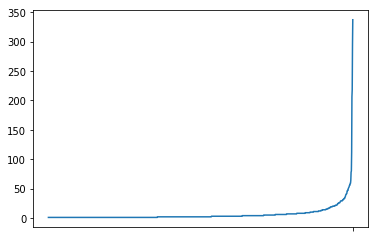

In [5]:
plt.plot(dfRankGroups['rank'])
plt.xticks('')

In [6]:
#Tratando generos para uma lista
generos = []

for value in df['genre'].values:
    value = value.replace("u'", "")
    value = value.replace("'", "")
    value = value.replace("[", "")
    value = value.replace("]", "")
    
    musica = value.split(", ")
    
    generos.append(musica)

dfWithGenreList = df.copy()
    
dfWithGenreList['genre'] = generos

In [7]:
def recuperarGenerosUnicos(generos):
    generos_unicos = {}
    for lista_generos in generos:
        for genero in lista_generos:
            if genero in generos_unicos:
                generos_unicos[genero] += 1
            else:
                generos_unicos[genero] = 1

    generos_unicos = pd.DataFrame.from_dict(generos_unicos, orient='index')
    generos_unicos.sort_values(by=0, ascending=False, inplace=True)
    
    return generos_unicos

generos_unicos = recuperarGenerosUnicos(generos)
generos_unicos

,0
pop,3114
dance pop,2685
pop rap,2201
rap,1828
post-teen pop,1563
hip hop,1335
r&b,1326
contemporary country,1252
southern hip hop,1188
country,1154


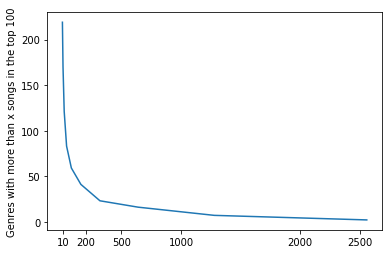

In [8]:
generosDF = generos_unicos
countList = []
iList = []

i = 5

while generosDF.shape[0] > 5:
    generosDF = generosDF[generosDF[0] > i]
    iList.append(i)
    countList.append(generosDF.shape[0])
    i *= 2
    
plt.plot(iList,countList)
plt.ylabel('Genres with more than x songs in the top 100')
plt.xticks([10,200,500,1000,2000,2500])
plt.show()

In [9]:
#cria uma lista com os genêros relevantes a partir de um número arbitrário (5%) de músicas do dataframe original
def recuperarGenerosRelevantes(df):
    generos_unicos = recuperarGenerosUnicos(df['genre'])
    
    generos_unicos.sort_values(by=0, ascending=False, inplace=True)
    generos_relevantes = generos_unicos[generos_unicos[0] >= df.shape[0]*0.05]
    return generos_relevantes

generos_relevantes = recuperarGenerosRelevantes(dfWithGenreList)
generos_relevantes

,0
pop,3114
dance pop,2685
pop rap,2201
rap,1828
post-teen pop,1563
hip hop,1335
r&b,1326
contemporary country,1252
southern hip hop,1188
country,1154


In [10]:
#itera sobre os gêneros adicionando colunas ao nosso dataframe de musicas para tratá-los como dados classificatórios

def tratarGeneros(dfWithGenreList):
    generos_relevantes = recuperarGenerosRelevantes(dfWithGenreList)
    
    dfGenreRank = dfWithGenreList[['peak_pos', 'weeks', 'rank', 'genre']]

    for i in range(generos_relevantes.shape[0]):
        dfGenreRank.insert(i+4, generos_relevantes.index.values[i], list(dfGenreRank.genre.map(set([generos_relevantes.index.values[i]]).issubset)))

    return generos_relevantes, dfGenreRank 

generos_relevantes, dfGenreRank = tratarGeneros(dfWithGenreList)
dfGenreRank

,peak_pos,weeks,rank,genre,pop,dance pop,pop rap,rap,post-teen pop,hip hop,...,urban contemporary,trap music,hip pop,dirty south rap,pop rock,modern country rock,gangster rap,neo mellow,neo soul,post-grunge
1,41,5,41,[rap],False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,11,2,31,"[pop rap, rap]",False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,22,5,22,"[dance pop, pop, post-teen pop]",True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,11,11,23,"[pop, rap]",True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
8,58,4,93,"[contemporary country, country road]",False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,7,7,20,"[pop, rap]",True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11,6,11,7,"[dance pop, indie r&b, pop, r&b, urban contemp...",True,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
12,4,11,54,"[canadian pop, pop, rap]",True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
13,10,10,43,"[dance pop, hip pop, pop, pop rap, rap]",True,True,True,True,False,False,...,False,False,True,False,False,False,False,False,False,False
14,69,1,69,"[hip hop, pop, pop rap, rap]",True,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [11]:
#agrupa por gênero para tirar estatísticas
def agruparGeneros(generos_relevantes, dfGenreRank):    
    estatisticas_generos = {}
    for i in range(generos_relevantes.shape[0]):
        genero = generos_relevantes.index.values[i]
        df_genero = dfGenreRank[['peak_pos', 'weeks', 'rank', genero]]
        group_genero = df_genero[df_genero[genero] == True]
        group_genero = group_genero.mean()[['peak_pos', 'weeks', 'rank']]

        estatisticas_generos[genero] = group_genero

    return pd.DataFrame.from_dict(estatisticas_generos, orient='index')

generos_relevantes, dfGenreRank = tratarGeneros(dfWithGenreList)

estatisticas_generos = agruparGeneros(generos_relevantes, dfGenreRank)
estatisticas_generos

,peak_pos,weeks,rank
contemporary country,50.824281,15.753994,81.789137
country,50.308492,16.003466,82.419411
country road,50.912078,15.943162,82.215808
dance pop,40.623836,14.080819,71.757914
dirty south rap,46.360778,13.711078,76.851796
gangster rap,48.258333,13.180000,78.558333
hip hop,46.922097,12.519101,76.298127
hip pop,40.816857,15.969823,75.122789
modern country rock,54.047771,15.581210,82.821656
neo mellow,44.609053,17.162551,72.960905


Agora que possuímos estatísticas para as músicas discretizadas por gênero, podemos analisá-las.

In [12]:
estatisticas_generos.sort_values(by='peak_pos')

,peak_pos,weeks,rank
r&b,39.892157,15.884615,73.469080
urban contemporary,40.230843,15.851533,74.700192
dance pop,40.623836,14.080819,71.757914
hip pop,40.816857,15.969823,75.122789
post-teen pop,41.799104,12.564299,70.654511
pop,43.246949,13.445087,71.406230
pop rock,43.919877,17.137134,74.556240
neo mellow,44.609053,17.162551,72.960905
pop rap,44.671513,13.832349,74.493412
dirty south rap,46.360778,13.711078,76.851796


In [13]:
estatisticas_generos.sort_values(by='rank')

,peak_pos,weeks,rank
post-teen pop,41.799104,12.564299,70.654511
pop,43.246949,13.445087,71.406230
dance pop,40.623836,14.080819,71.757914
neo mellow,44.609053,17.162551,72.960905
r&b,39.892157,15.884615,73.469080
pop rap,44.671513,13.832349,74.493412
pop rock,43.919877,17.137134,74.556240
urban contemporary,40.230843,15.851533,74.700192
rap,47.416302,12.429431,75.063457
hip pop,40.816857,15.969823,75.122789


In [14]:
estatisticas_generos.sort_values(by='weeks', ascending=False)

,peak_pos,weeks,rank
neo mellow,44.609053,17.162551,72.960905
pop rock,43.919877,17.137134,74.556240
post-grunge,51.387409,16.704600,78.532688
country,50.308492,16.003466,82.419411
hip pop,40.816857,15.969823,75.122789
country road,50.912078,15.943162,82.215808
r&b,39.892157,15.884615,73.469080
urban contemporary,40.230843,15.851533,74.700192
contemporary country,50.824281,15.753994,81.789137
modern country rock,54.047771,15.581210,82.821656


Assim, pelos três atributos analisados, podemos perceber algumas características: músicas que contém o estilo r&b, urban contemporary, dance pop e hip hop atingem posições mais altas no ranking. Porém, em geral, músicas pop (post-teen pop, pop e dance pop) permanecem em colocações mais altas durante a permanência. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock são os mais altos, ficando em média 17 semanas no topo.

Agora, precisamos analisar se essas informações são ou não determinísticos. Vamos começar analisando a amostra das músicas que atingiram as 10 primeiras posições do ranking.

In [15]:
dfTop10 = dfWithGenreList[dfWithGenreList['peak_pos'] < 11]
dfTop10

,date,title,artist,peak_pos,last_pos,weeks,rank,change,genre,energy,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
9,6/21/18,Better Now,Post Malone,7,34,7,20,14,"[pop, rap]",0.563,...,0.0454,0.354000,0.000000,4.0,0.680,10.0,231267.0,-5.843,0.3740,1.0
11,6/21/18,Boo'd Up,Ella Mai,6,6,11,7,-1,"[dance pop, indie r&b, pop, r&b, urban contemp...",0.779,...,0.0531,0.086200,0.000000,4.0,0.561,10.0,256064.0,-5.107,0.2350,0.0
12,6/21/18,Call Out My Name,The Weeknd,4,52,11,54,-2,"[canadian pop, pop, rap]",0.599,...,0.0369,0.211000,0.000000,3.0,0.449,1.0,228373.0,-4.892,0.1650,1.0
13,6/21/18,Chun-Li,Nicki Minaj,10,46,10,43,3,"[dance pop, hip pop, pop, pop rap, rap]",0.766,...,0.3840,0.307000,0.000014,4.0,0.643,6.0,191606.0,-4.788,0.4630,0.0
23,6/21/18,Fake Love,BTS,10,48,4,71,-23,[k-pop],0.719,...,0.0372,0.002670,0.000000,4.0,0.557,2.0,242334.0,-4.515,0.3440,0.0
32,6/21/18,God's Plan,Drake,1,5,21,4,1,"[canadian hip hop, canadian pop, hip hop, pop ...",0.449,...,0.1090,0.033200,0.000083,4.0,0.754,7.0,198973.0,-9.211,0.3570,1.0
45,6/21/18,KOD,J. Cole,10,60,8,65,-5,"[conscious hip hop, pop, pop rap, rap]",0.782,...,0.1500,0.210000,0.000000,4.0,0.831,0.0,191437.0,-6.274,0.1990,1.0
51,6/21/18,Lucid Dreams,Juice WRLD,6,9,5,6,3,[rap],0.566,...,0.2000,0.349000,0.000000,4.0,0.511,6.0,239836.0,-7.230,0.2180,0.0
56,6/21/18,Never Be The Same,Camila Cabello,6,18,26,19,-1,"[dance pop, pop, post-teen pop]",0.713,...,0.0747,0.181000,0.000637,4.0,0.637,0.0,226973.0,-4.333,0.2430,1.0
57,6/21/18,New Rules,Dua Lipa,6,40,46,35,5,[pop],0.700,...,0.0694,0.002610,0.000016,4.0,0.762,9.0,209320.0,-6.021,0.6080,0.0


In [16]:
generos_relevantes, dfGenreRank = tratarGeneros(dfTop10)
musicasTop10 = agruparGeneros(generos_relevantes, dfGenreRank)
musicasTop10

,peak_pos,weeks,rank
dance pop,4.474085,26.321646,49.211890
dirty south rap,4.813008,24.056911,48.813008
gangster rap,4.881188,23.990099,51.069307
hip hop,4.512605,24.516807,50.802521
hip pop,4.343891,25.773756,49.162896
neo mellow,5.128571,37.314286,48.000000
neo soul,4.846154,26.861538,50.938462
pop,4.451852,27.600000,48.025185
pop rap,4.523918,26.066059,48.250569
pop rock,5.160377,34.679245,50.141509


In [17]:
musicasTop10.sort_values(by='peak_pos')

,peak_pos,weeks,rank
urban contemporary,4.184211,25.744361,49.003759
r&b,4.256637,26.430678,49.412979
hip pop,4.343891,25.773756,49.162896
pop,4.451852,27.600000,48.025185
post-teen pop,4.469444,26.780556,50.094444
dance pop,4.474085,26.321646,49.211890
hip hop,4.512605,24.516807,50.802521
pop rap,4.523918,26.066059,48.250569
rap,4.677632,24.506579,48.914474
southern hip hop,4.765625,25.296875,48.442708


In [18]:
musicasTop10.sort_values(by='rank')

,peak_pos,weeks,rank
trap music,5.162791,24.596899,46.620155
neo mellow,5.128571,37.314286,48.000000
pop,4.451852,27.600000,48.025185
pop rap,4.523918,26.066059,48.250569
southern hip hop,4.765625,25.296875,48.442708
dirty south rap,4.813008,24.056911,48.813008
rap,4.677632,24.506579,48.914474
urban contemporary,4.184211,25.744361,49.003759
hip pop,4.343891,25.773756,49.162896
dance pop,4.474085,26.321646,49.211890


In [19]:
musicasTop10.sort_values(by='weeks', ascending=False)

,peak_pos,weeks,rank
neo mellow,5.128571,37.314286,48.000000
pop rock,5.160377,34.679245,50.141509
pop,4.451852,27.600000,48.025185
neo soul,4.846154,26.861538,50.938462
post-teen pop,4.469444,26.780556,50.094444
r&b,4.256637,26.430678,49.412979
dance pop,4.474085,26.321646,49.211890
pop rap,4.523918,26.066059,48.250569
hip pop,4.343891,25.773756,49.162896
urban contemporary,4.184211,25.744361,49.003759


Observamos aqui certa semelhança com o dataframe quando tratado em sua interidade. Músicas que contém o estilo r&b, urban contemporary e hip hop também atingiram posições mais altas no ranking. A média do rank porém não foi semelhante. Em questão de permanência no top 100, os gêneros neo_mellow e pop rock também continuam os mais altos.

Assim, agora vamos analisar se as músicas que atingem as posições mais altas realmente tem gêneros em comum ou se isso pode ser explicado pelo acaso.

In [20]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    generos_relevantes, dfGenreRank = tratarGeneros(df)
    
    for i in range(n):
        sample = dfGenreRank.sample(size, replace=True)
        values.append(agruparGeneros(generos_relevantes, sample)['peak_pos'])
    return values

In [21]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [30]:
resultado_bootstrap = pd.DataFrame(bootstrap(dfWithGenreList, 1000))

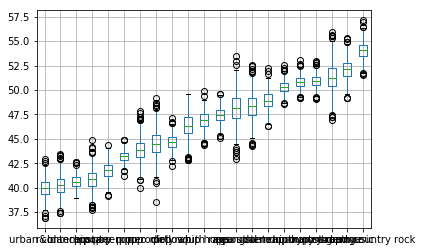

In [31]:
resultado_bootstrap = resultado_bootstrap.reindex(resultado_bootstrap.mean().sort_values().index, axis=1)
resultado_bootstrap.boxplot()

In [25]:
resultado_bootstrap_copia = resultado_bootstrap.copy()
averages = resultado_bootstrap_copia.mean()
averages_sorted = averages.sort_values()
top_5_generos_peak_pos_bootstrap = resultado_bootstrap[averages_sorted[:5].keys()]

In [26]:
top_5_generos_peak_pos_real = {"a":40}
chaves = averages_sorted[:5].keys()
for i in range(5):
    for j in estatisticas_generos.index:
        if j == chaves[i]:
            top_5_generos_peak_pos_real[chaves[i]] = estatisticas_generos.get_value(j, col='peak_pos')

top_5_generos_peak_pos_real = pd.Series(top_5_generos_peak_pos_real)
top_5_generos_peak_pos_real

C:\Users\pauli\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                     40.000000
r&b                   39.892157
urban contemporary    40.230843
dance pop             40.623836
hip pop               40.816857
post-teen pop         41.799104
dtype: float64

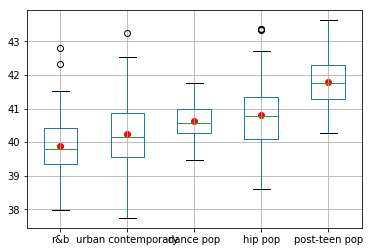

Index(['a', 'r&b', 'urban contemporary', 'dance pop', 'hip pop',
       'post-teen pop'],
      dtype='object')

In [27]:
top_5_generos_peak_pos_bootstrap.boxplot()
plt.scatter(y=top_5_generos_peak_pos_real.values, x=top_5_generos_peak_pos_real.keys(), color='red')
plt.show()
top_5_generos_peak_pos_real.keys()

Assim, podemos observar que o nosso resultado inicial coincide com a média encontrada a partir da realização do bootstrap, o que é uma evidência convincente que os gêneros com músicas melhores colocas não é causado pelo acaso.